In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf

In [2]:
matches = pd.read_csv("datasets/Matches.csv")
world_cup = pd.read_csv("datasets/World-Cups.csv")

In [3]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Score Penalties,Attendance,Round_ID,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,0-0,4444,201,3,0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,0-0,18346,201,2,0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,0-0,24059,201,2,0,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,0-0,2549,201,1,0,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,0-0,23409,201,0,0,ARG,FRA


In [4]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Score Penalties,Attendance,Round_ID,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
959,2022,10 Dec 2022 - 22:00,Quarter-finals,Al Bayt Stadium,Al Khor,England,1,2,France,0-0,68895,222,0,1,ENG,FRA
960,2022,13 Dec 2022 - 22:00,Semi-finals,Lusail Stadium,Lusail,Argentina,3,0,Croatia,0-0,88966,222,2,0,ARG,HRV
961,2022,14 Dec 2022 - 22:00,Semi-finals,Al Bayt Stadium,Al Khor,France,2,0,Morocco,0-0,68294,222,1,0,FRA,MAR
962,2022,17 Dec 2022 - 18:00,Play-off for third place,Khalifa International Stadium,Al Rayyan,Croatia,2,1,Morocco,0-0,44137,222,2,1,HRV,MAR
963,2022,18 Dec 2022 - 18:00,Final,Lusail Stadium,Lusail,Argentina,3,3,France,4–2,88966,222,2,0,ARG,FRA


In [5]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Round_ID
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,201
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,202
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,203
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,204
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,205


# Data Cleaning

In [6]:
# Dropping missing values in year
matches.dropna(subset=['Year'], inplace=True)

In [7]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Score Penalties,Attendance,Round_ID,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
959,2022,10 Dec 2022 - 22:00,Quarter-finals,Al Bayt Stadium,Al Khor,England,1,2,France,0-0,68895,222,0,1,ENG,FRA
960,2022,13 Dec 2022 - 22:00,Semi-finals,Lusail Stadium,Lusail,Argentina,3,0,Croatia,0-0,88966,222,2,0,ARG,HRV
961,2022,14 Dec 2022 - 22:00,Semi-finals,Al Bayt Stadium,Al Khor,France,2,0,Morocco,0-0,68294,222,1,0,FRA,MAR
962,2022,17 Dec 2022 - 18:00,Play-off for third place,Khalifa International Stadium,Al Rayyan,Croatia,2,1,Morocco,0-0,44137,222,2,1,HRV,MAR
963,2022,18 Dec 2022 - 18:00,Final,Lusail Stadium,Lusail,Argentina,3,3,France,4–2,88966,222,2,0,ARG,FRA


In [8]:
matches['Home Team Name'].value_counts()

Brazil                       85
Argentina                    59
Italy                        57
Germany FR                   43
England                      41
                             ..
Bolivia                       1
Jamaica                       1
Angola                        1
rn">Serbia and Montenegro     1
United States                 1
Name: Home Team Name, Length: 84, dtype: int64

In [9]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [10]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [11]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [12]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana', 'Stade V�lodrome', 'Malm�', 'Norrk�Ping', 'D�Sseldorf', 'Estadio Jos� Mar�a Minella', 'Estadio Ol�mpico Chateau Carreras', 'La Coru�A', "C�te d'Ivoire"]
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium', 'Stade Vélodrome', 'Malmö', 'Norrköping', 'Düsseldorf', 'Estadio José María Minella', 'Estadio Olímpico Chateau Carreras', 'La Coruña', "Côte d'Ivoire"]

In [13]:
wrong = wrong + old_name
correct = correct + new_name

In [14]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana',
  'Stade V�lodrome',
  'Malm�',
  'Norrk�Ping',
  'D�Sseldorf',
  'Estadio Jos� Mar�a Minella',
  'Estadio Ol�mpico Chateau Carreras',
  'La Coru�A',
  "C�te d'Ivoire"],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium',
  'Stade Vélodrome',
  'Malmö',
  'Norrköping',
  'Düsseldorf',
  'Estadio José María Minella',
  'Estadio Olímpico Chateau Carreras',
  'La Coruña',
  "Côte d'Ivoire"])

In [15]:
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

In [16]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

In [17]:
wc = pd.DataFrame(world_cup)
mdf = pd.DataFrame(matches)

wc.to_csv('world_cups.csv', index = False)
mdf.to_csv('matches.csv', index = False)
print(mdf)

     Year             Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                   Group 1   
1    1930  13 Jul 1930 - 15:00                   Group 4   
2    1930  14 Jul 1930 - 12:45                   Group 2   
3    1930  14 Jul 1930 - 14:50                   Group 3   
4    1930  15 Jul 1930 - 16:00                   Group 1   
..    ...                  ...                       ...   
959  2022  10 Dec 2022 - 22:00            Quarter-finals   
960  2022  13 Dec 2022 - 22:00               Semi-finals   
961  2022  14 Dec 2022 - 22:00               Semi-finals   
962  2022  17 Dec 2022 - 18:00  Play-off for third place   
963  2022  18 Dec 2022 - 18:00                     Final   

                           Stadium        City Home Team Name  \
0                          Pocitos  Montevideo         France   
1                   Parque Central  Montevideo            USA   
2                   Parque Central  Montevideo     Yugoslavia   
3                  

# Most Number of World Cup Winning Title

In [18]:
winner = world_cup['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Argentina    3
Uruguay      2
France       2
England      1
Spain        1
Name: Winner, dtype: int64

In [19]:
runnerup = world_cup['Runners-Up'].value_counts()
runnerup

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
France            2
Sweden            1
Croatia           1
Name: Runners-Up, dtype: int64

In [20]:
third = world_cup['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
Croatia        2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Turkey         1
Netherlands    1
Belgium        1
Name: Third, dtype: int64

In [21]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Argentina,3,3,0
Uruguay,2,0,0
France,2,2,2
England,1,0,0
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [22]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [23]:
teams.iplot(kind = 'bar', xTitle='Teams', yTitle='Count', title='FIFA World Cup Winning Count')

# Number of Goal Per Countary

In [24]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Score Penalties,Attendance,Round_ID,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,0-0,4444,201,3,0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,0-0,18346,201,2,0,USA,BEL


In [25]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [26]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [27]:
goals = home.append(away, ignore_index = True)

C:\Users\syntronic\AppData\Local\Temp\ipykernel_7592\2748964524.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [28]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,13
Angola,1
Argentina,152
Australia,17
Austria,43
...,...
United States,3
Uruguay,89
Wales,5


In [29]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Brazil,237
Germany,232
Argentina,152
France,136
Italy,128
...,...
Bolivia,1
Dutch East Indies,0
Trinidad and Tobago,0


In [30]:
goals[:20].iplot(kind='bar', xTitle = 'Country Names', yTitle = 'Goals', title = 'Countries Hits Number of Goals')

# Attendance, Number of Teams, Goals, and Matches per Cup

In [31]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Round_ID
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,201
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,202
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,203
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,204
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607,205


Text(0.5, 1.0, 'Matches Played by Teams Per Year')

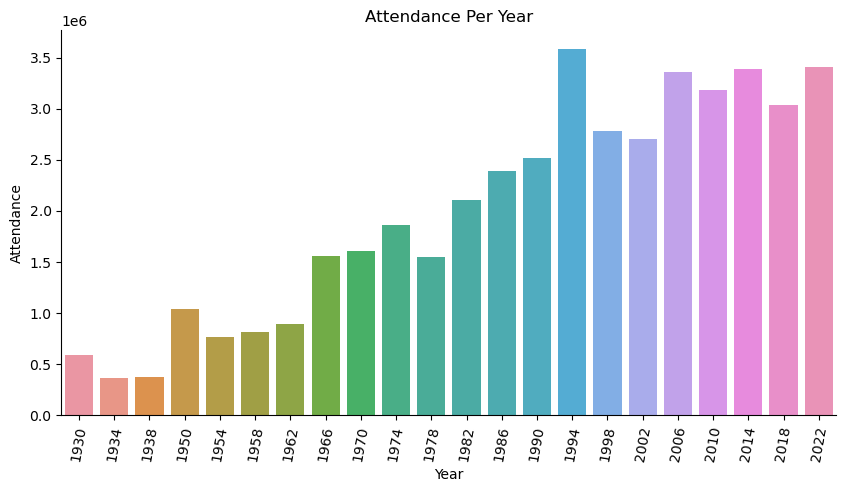

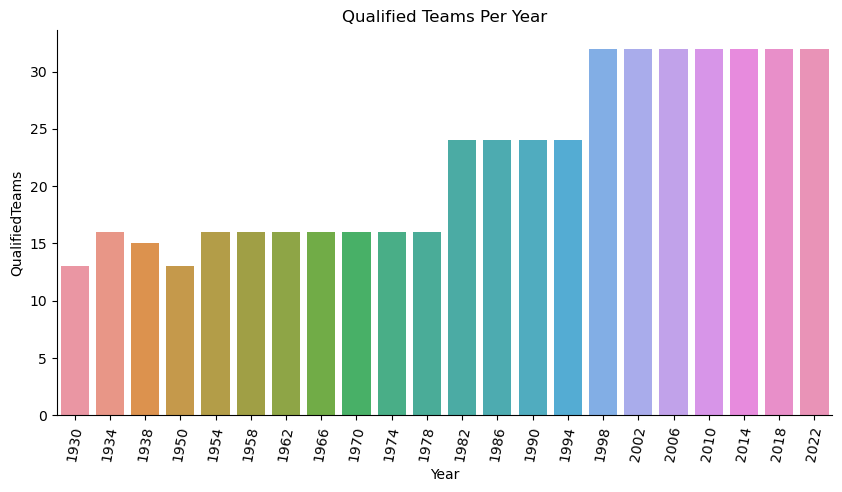

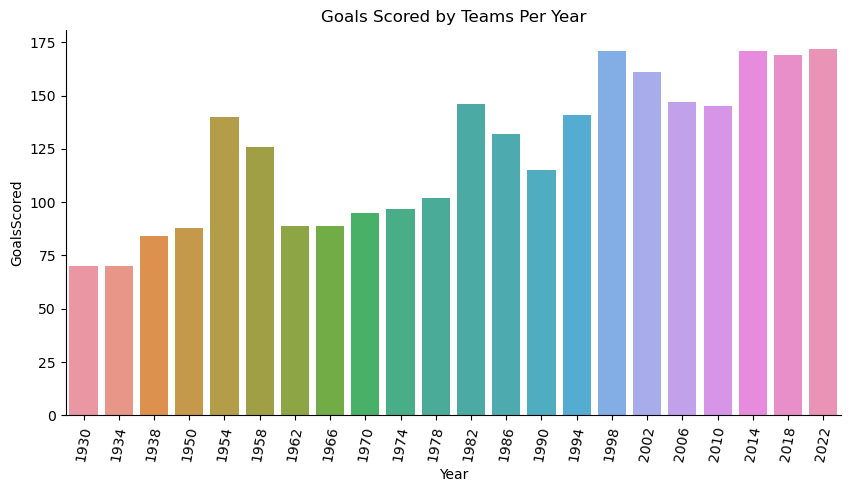

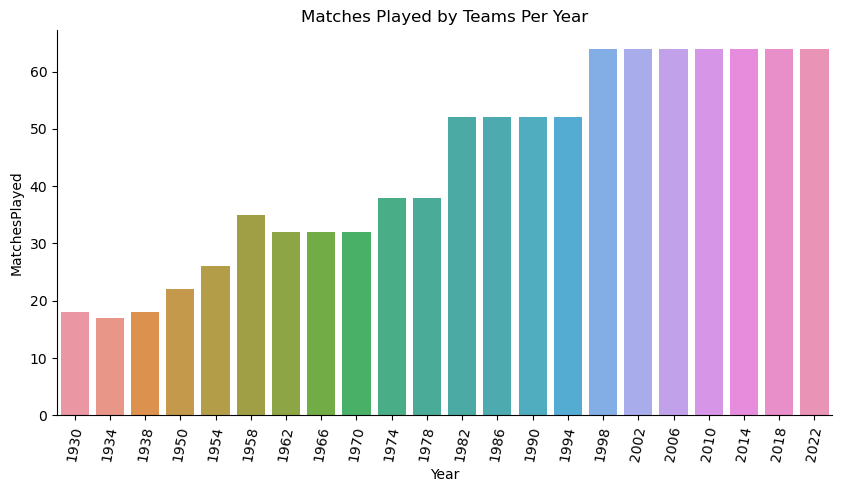

In [32]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')

#==========================================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

#==========================================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')


#==========================================


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played by Teams Per Year')


# Goals Per Team Per World Cup

In [33]:

matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Score Penalties,Attendance,Round_ID,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,0-0,4444,201,3,0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,0-0,18346,201,2,0,USA,BEL


In [34]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year  Home Team Name
1930  Argentina         16
      Brazil             4
      Chile              4
      France             4
      Paraguay           1
                        ..
2022  Switzerland        1
      Tunisia            1
      United States      1
      Uruguay            0
      Wales              0
Name: Home Team Goals, Length: 430, dtype: int64

In [35]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year  Away Team Name
1930  Argentina         2
      Belgium           0
      Bolivia           0
      Brazil            1
      Chile             1
                       ..
2022  Switzerland       4
      Tunisia           0
      United States     2
      Uruguay           2
      Wales             1
Name: Away Team Goals, Length: 475, dtype: int64

In [36]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                 
1930 Argentina   18.0
     Brazil       5.0
     Chile        5.0
     France       4.0
     Paraguay     1.0
...               ...
1998 Iran         2.0
     Mexico       8.0
     Norway       5.0
     Tunisia      1.0
2006 IR Iran      0.0

[491 rows x 1 columns]

In [37]:
goals = goals.reset_index()

In [38]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930,Argentina,18.0
7,1930,Uruguay,15.0
6,1930,USA,7.0
8,1930,Yugoslavia,7.0
1,1930,Brazil,5.0
...,...,...,...
400,2022,Belgium,1.0
406,2022,Denmark,1.0
419,2022,Qatar,1.0
426,2022,Tunisia,1.0


In [39]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930,Argentina,18.0
7,1930,Uruguay,15.0
6,1930,USA,7.0
8,1930,Yugoslavia,7.0
1,1930,Brazil,5.0
13,1934,Italy,12.0
11,1934,Germany,11.0
10,1934,Czechoslovakia,9.0
9,1934,Austria,7.0
12,1934,Hungary,5.0


In [40]:
import plotly.graph_objects as go

In [41]:

x, y = goals['Year'].values, goals['Goals'].values

In [42]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

# Matches With Highest Number Of Attendance

In [43]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [44]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))

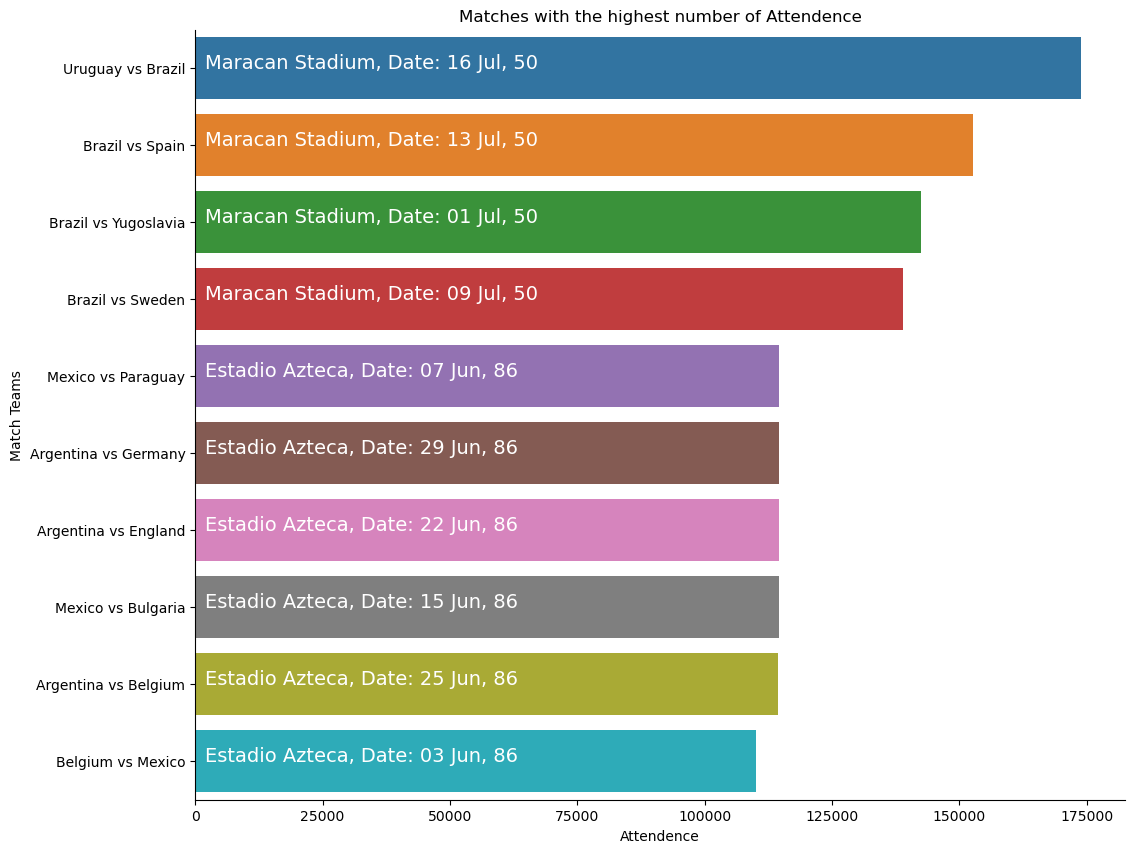

In [45]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate(top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 14, color = 'white')
plt.show()

# Stadium with Highest Average Attendance

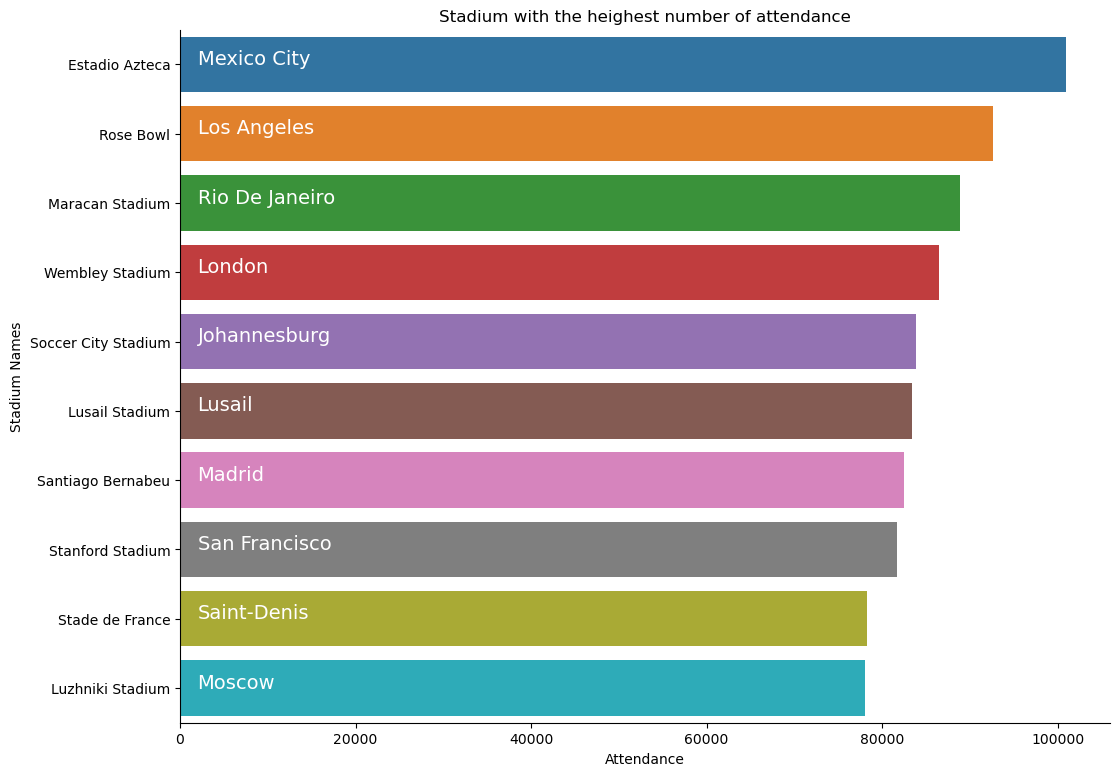

In [46]:
matches['Year'] = pd.to_numeric(matches['Year'])

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate(top10['City']):
        ax.text(2000, i, s, fontsize = 14, color = 'white')
        
plt.show()

In [47]:
matches['City'].value_counts()[:20].iplot(kind = 'bar')

# Which countries had won the cup ?

Text(0.5, 1.0, 'Number of podium by country')

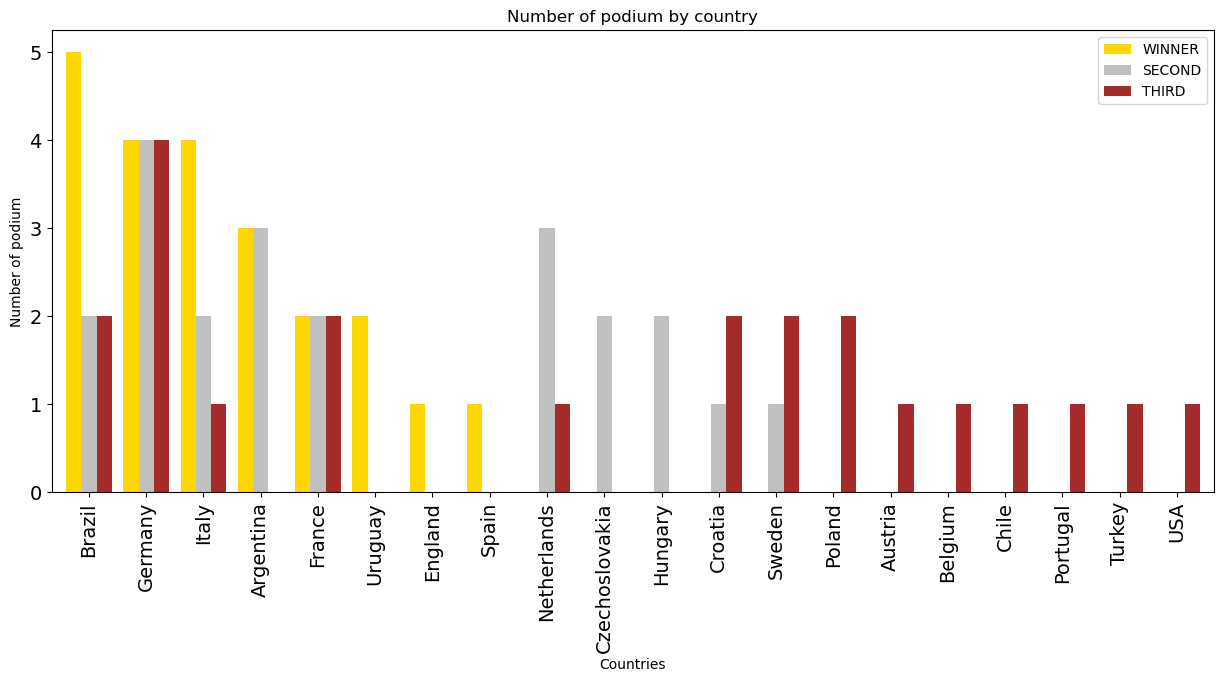

In [48]:
gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

# Number of goal per country

C:\Users\syntronic\AppData\Local\Temp\ipykernel_7592\2805712483.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\syntronic\AppData\Local\Temp\ipykernel_7592\2805712483.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 1.0, 'Top 10 of Number of goals by country')

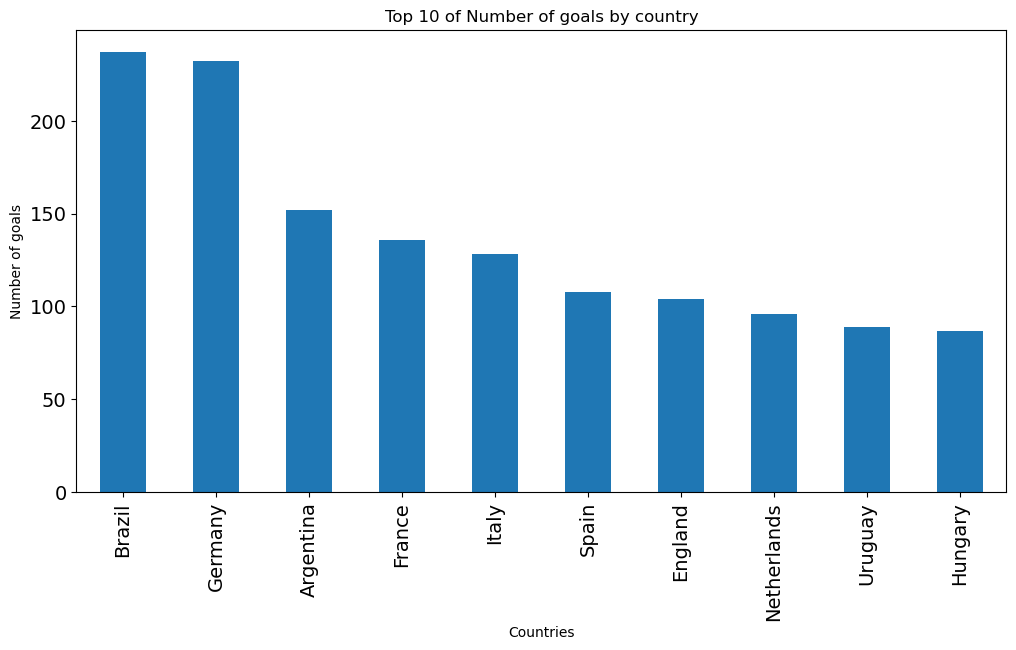

In [49]:
#world_cups_matches['Win conditions'].value_counts()
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

# Match outcome by home and away temas

In [50]:

def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [51]:
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [52]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Score Penalties,Attendance,Round_ID,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials,outcome
0,1930,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4,1,Mexico,0-0,4444,201,3,0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3,0,Belgium,0-0,18346,201,2,0,USA,BEL,Home Team Win
2,1930,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,0-0,24059,201,2,0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3,1,Peru,0-0,2549,201,1,0,ROU,PER,Home Team Win
4,1930,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1,0,France,0-0,23409,201,0,0,ARG,FRA,Home Team Win


In [53]:
mt = matches['outcome'].value_counts()
mt

Home Team Win    534
Away Team Win    216
DRAW             214
Name: outcome, dtype: int64

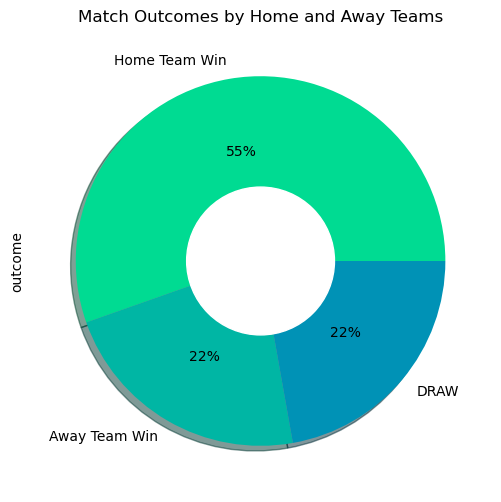

In [54]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

# Conclusion

According to the analysis it is seen that the number of wins corelates to the number of goals scored in a match and the team with the most goals before the finals is more likely to win the tournament. And the country with highest goals is likely to ein the next tournament.
It was also observed that the home team has the highest chance of winning a match.